In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [47]:
dataframe = pd.read_csv("AmesHousing.csv") 
dataframe.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [48]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [49]:
null_counts = dataframe.isna().sum()
print(null_counts[null_counts > 0])

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


1. Removing cloumn with almost evry entry as NaN
2. Fill in the entirs with feweer NaN values (mean, median, conditioning)

In [50]:
dataframe= dataframe.drop(columns=['Pool QC'])

In [51]:
null_counts = dataframe.isna().sum()
print(null_counts[null_counts > 0])

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Fence             2358
Misc Feature      2824
dtype: int64


In [52]:
# 1. Calculate the number of NaNs per column
null_counts = dataframe.isna().sum()

# 2. Filter for columns where the count is > 0 and < 84
# (Change to <= 84 if you want to include columns with exactly 84 NaNs)
mask = (null_counts > 0) & (null_counts < 84)
target_columns = null_counts[mask].index

# 3. Create the new dataframe
new_df = dataframe[target_columns].copy()

# Optional: Verify the result
print(new_df.isna().sum())

Mas Vnr Area      23
Bsmt Qual         80
Bsmt Cond         80
Bsmt Exposure     83
BsmtFin Type 1    80
BsmtFin SF 1       1
BsmtFin Type 2    81
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Electrical         1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64


In [53]:
new_df.head(50)

,Mas Vnr Area,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Electrical,Bsmt Full Bath,Bsmt Half Bath,Garage Cars,Garage Area
0,112.0,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,SBrkr,1.0,0.0,2.0,528.0
1,0.0,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,SBrkr,0.0,0.0,1.0,730.0
2,108.0,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,SBrkr,0.0,0.0,1.0,312.0
3,0.0,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,SBrkr,1.0,0.0,2.0,522.0
4,0.0,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,SBrkr,0.0,0.0,2.0,482.0
5,20.0,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,SBrkr,0.0,0.0,2.0,470.0
6,0.0,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,SBrkr,1.0,0.0,2.0,582.0
7,0.0,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,SBrkr,0.0,0.0,2.0,506.0
8,0.0,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,SBrkr,1.0,0.0,2.0,608.0
9,0.0,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,SBrkr,0.0,0.0,2.0,442.0


1. Separate features into numerical and categorical
2. Conduct statistical analysis on numerical and frequency analysis on categorical.

In [54]:
# 1. Extract Numerical Features
# This includes integers (int64) and floats (float64)
df_numeric = new_df.select_dtypes(include=['number'])

# 2. Extract Categorical Features
# This includes strings (object) and the Pandas 'category' type
df_categorical = new_df.select_dtypes(include=['object', 'category'])

# Verify the splits
print(f"Numerical columns: {df_numeric.columns.tolist()}")
print(f"Categorical columns: {df_categorical.columns.tolist()}")

Numerical columns: ['Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area']
Categorical columns: ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical']


In [55]:


# Calculate Mean (Numerical only)
print("--- Mean ---")
print(df_numeric.mean(numeric_only=True))

# Calculate Median (Numerical only)
print("\n--- Median ---")
print(df_numeric.median(numeric_only=True))

# Calculate Mode 
# Note: .mode() returns a Data frame because a column can have multiple modes (ties)
print("\n--- Mode (First row) ---")
print(df_numeric.mode().iloc[0])

--- Mean ---
Mas Vnr Area       101.896801
BsmtFin SF 1       442.629566
BsmtFin SF 2        49.722431
Bsmt Unf SF        559.262547
Total Bsmt SF     1051.614544
Bsmt Full Bath       0.431352
Bsmt Half Bath       0.061134
Garage Cars          1.766815
Garage Area        472.819734
dtype: float64

--- Median ---
Mas Vnr Area        0.0
BsmtFin SF 1      370.0
BsmtFin SF 2        0.0
Bsmt Unf SF       466.0
Total Bsmt SF     990.0
Bsmt Full Bath      0.0
Bsmt Half Bath      0.0
Garage Cars         2.0
Garage Area       480.0
dtype: float64

--- Mode (First row) ---
Mas Vnr Area      0.0
BsmtFin SF 1      0.0
BsmtFin SF 2      0.0
Bsmt Unf SF       0.0
Total Bsmt SF     0.0
Bsmt Full Bath    0.0
Bsmt Half Bath    0.0
Garage Cars       2.0
Garage Area       0.0
Name: 0, dtype: float64


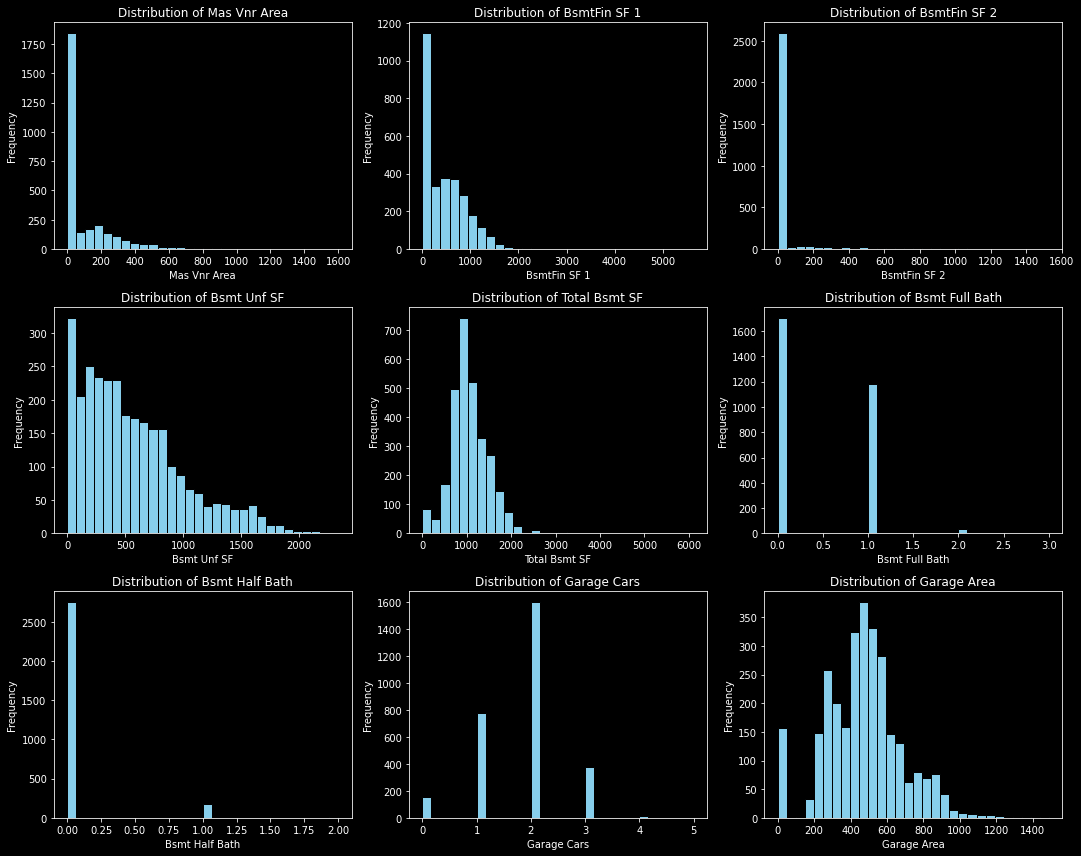

In [56]:
import matplotlib.pyplot as plt

# Assuming df_numeric is your numerical DataFrame
cols = df_numeric.columns
n_cols = 3
n_rows = (len(cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Flatten to iterate easily

for i, col in enumerate(cols):
    # Remove NaN values for the specific column to avoid plotting errors
    data = df_numeric[col].dropna()
    
    axes[i].hist(data, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

for i, col in enumerate(cols):
    data = df_numeric[col].dropna()
    axes[i].hist(data, bins=30, color='skyblue', edgecolor='black')
    
    # Set Title and Axis Labels to White
    axes[i].set_title(f'Distribution of {col}', color='white')
    axes[i].set_xlabel(col, color='white')
    axes[i].set_ylabel('Frequency', color='white')
    
    # Set the numbers on the axes (ticks) to White
    axes[i].tick_params(axis='x', colors='white')
    axes[i].tick_params(axis='y', colors='white')
    
    # Optional: Change the spine (border) color to white
    for spine in axes[i].spines.values():
        spine.set_edgecolor('white')

plt.tight_layout()
plt.show()



1. "Mas Vnr Area", "BsmtFin SF 2", "Bsmt Half Bath" nan to zero
2. "Garage Area", "Total Bsmt SF" nan to mean (gaussian dist)
3. "Garage Cars", "Bsmt Unf SF", "BsmtFin SF 1" nan to median (non gausian dist)

In [57]:
# This updates the column in place
dataframe['BsmtFin SF 1'] = dataframe['BsmtFin SF 1'].fillna(df_numeric['BsmtFin SF 1'].median())
dataframe['Bsmt Unf SF'] = dataframe['Bsmt Unf SF'].fillna(df_numeric['Bsmt Unf SF'].median())
dataframe['Garage Cars'] = dataframe['Garage Cars'].fillna(df_numeric['Garage Cars'].median())
dataframe['Total Bsmt SF'] = dataframe['Total Bsmt SF'].fillna(df_numeric['Total Bsmt SF'].mean())
dataframe['Garage Area'] = dataframe['Garage Area'].fillna(df_numeric['Garage Area'].mean())
dataframe['Bsmt Half Bath'] = dataframe['Bsmt Half Bath'].fillna(0)
dataframe['BsmtFin SF 2'] = dataframe['BsmtFin SF 2'].fillna(0)
dataframe['Mas Vnr Area'] = dataframe['Mas Vnr Area'].fillna(0)


In [58]:
df_numeric.head()

,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Cars,Garage Area
0,112.0,639.0,0.0,441.0,1080.0,1.0,0.0,2.0,528.0
1,0.0,468.0,144.0,270.0,882.0,0.0,0.0,1.0,730.0
2,108.0,923.0,0.0,406.0,1329.0,0.0,0.0,1.0,312.0
3,0.0,1065.0,0.0,1045.0,2110.0,1.0,0.0,2.0,522.0
4,0.0,791.0,0.0,137.0,928.0,0.0,0.0,2.0,482.0


In [59]:
# 1. Calculate the number of NaNs per column
null_counts = df_numeric.isna().sum()

# 2. Filter for columns where the count is > 0 and < 84
# (Change to <= 84 if you want to include columns with exactly 84 NaNs)
mask = (null_counts > 0) & (null_counts < 84)
target_columns = null_counts[mask].index

# 3. Create the new dataframe
new_df1 = df_numeric[target_columns].copy()

# Optional: Verify the result
print(new_df1.isna().sum())

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64


In [60]:
dataframe['Bsmt Full Bath'] = dataframe['Bsmt Full Bath'].fillna(0)

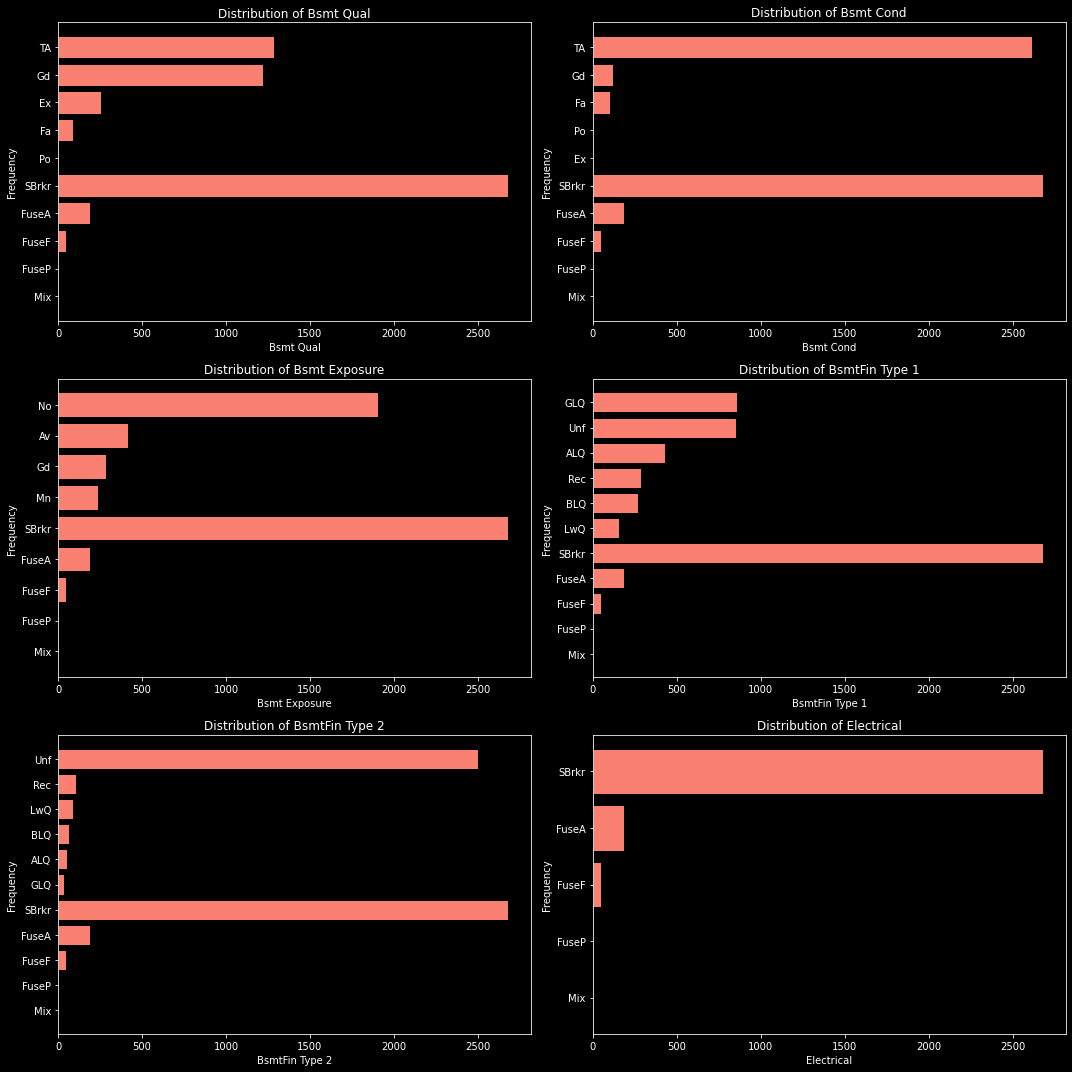

In [61]:
# Assuming df_categorical is your categorical DataFrame
cols = df_categorical.columns
n_cols = 2
n_rows = (len(cols) - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(cols):
    # Get counts and sort them
    counts = df_categorical[col].value_counts()
    
    # Use barh (horizontal) for better label readability
    axes[i].barh(counts.index.astype(str), counts.values, color='salmon', edgecolor='black')
    axes[i].set_title(f'Count of {col}')
    axes[i].invert_yaxis()  # Put the highest count at the top

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

import matplotlib.pyplot as plt

# ... (setup your subplots as before) ...

for i, col in enumerate(cols):
    data = df_categorical[col].dropna()
    axes[i].barh(counts.index.astype(str), counts.values, color='salmon', edgecolor='black')
    
    # Set Title and Axis Labels to White
    axes[i].set_title(f'Distribution of {col}', color='white')
    axes[i].set_xlabel(col, color='white')
    axes[i].set_ylabel('Frequency', color='white')
    
    # Set the numbers on the axes (ticks) to White
    axes[i].tick_params(axis='x', colors='white')
    axes[i].tick_params(axis='y', colors='white')
    
    # Optional: Change the spine (border) color to white
    for spine in axes[i].spines.values():
        spine.set_edgecolor('white')

plt.tight_layout()
plt.show()


In [62]:
df_categorical.head(2)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical
0,TA,Gd,Gd,BLQ,Unf,SBrkr
1,TA,TA,No,Rec,LwQ,SBrkr


1. Filling every nan value with mode

In [63]:
dataframe['Bsmt Qual'] = dataframe['Bsmt Qual'].fillna(dataframe['Bsmt Qual'].mode()[0])
dataframe['Bsmt Cond'] = dataframe['Bsmt Cond'].fillna(dataframe['Bsmt Cond'].mode()[0])
dataframe['Bsmt Exposure'] = dataframe['Bsmt Exposure'].fillna(dataframe['Bsmt Exposure'].mode()[0])
dataframe['BsmtFin Type 1'] = dataframe['BsmtFin Type 1'].fillna(dataframe['BsmtFin Type 1'].mode()[0])
dataframe['BsmtFin Type 2'] = dataframe['BsmtFin Type 2'].fillna(dataframe['BsmtFin Type 2'].mode()[0])
dataframe['Electrical'] = dataframe['Electrical'].fillna(dataframe['Electrical'].mode()[0])

In [64]:
null_counts = dataframe.isna().sum()
print(null_counts[null_counts > 0])

Lot Frontage      490
Alley            2732
Mas Vnr Type     1775
Fireplace Qu     1422
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Fence            2358
Misc Feature     2824
dtype: int64


In [65]:
# List of specific columns to extract
cols_to_extract = [
    'Lot Frontage', 'Alley', 'Mas Vnr Type', 'Fireplace Qu', 
    'Garage Type', 'Garage Yr Blt', 'Garage Finish', 
    'Garage Qual', 'Garage Cond', 'Fence', 'Misc Feature'
]

# Create the new dataframe
df_new1 = dataframe[cols_to_extract].copy()

# Preview the result
print(df_new1.head())

   Lot Frontage Alley Mas Vnr Type Fireplace Qu Garage Type  Garage Yr Blt  \
0         141.0   NaN        Stone           Gd      Attchd         1960.0   
1          80.0   NaN          NaN          NaN      Attchd         1961.0   
2          81.0   NaN      BrkFace          NaN      Attchd         1958.0   
3          93.0   NaN          NaN           TA      Attchd         1968.0   
4          74.0   NaN          NaN           TA      Attchd         1997.0   

  Garage Finish Garage Qual Garage Cond  Fence Misc Feature  
0           Fin          TA          TA    NaN          NaN  
1           Unf          TA          TA  MnPrv          NaN  
2           Unf          TA          TA    NaN         Gar2  
3           Fin          TA          TA    NaN          NaN  
4           Fin          TA          TA  MnPrv          NaN  


1. Again separating features into numeric and categoric

In [66]:
# 1. Extract Numerical Features
# This includes integers (int64) and floats (float64)
df_numeric1 = df_new1.select_dtypes(include=['number'])

# 2. Extract Categorical Features
# This includes strings (object) and the Pandas 'category' type
df_categorical1 = df_new1.select_dtypes(include=['object', 'category'])

# Verify the splits
print(f"Numerical columns: {df_numeric1.columns.tolist()}")
print(f"Categorical columns: {df_categorical1.columns.tolist()}")

Numerical columns: ['Lot Frontage', 'Garage Yr Blt']
Categorical columns: ['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Fence', 'Misc Feature']


Since nan values are significant we will apply Model-based imputation for numeric features


In [67]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
import pandas as pd

# 1. Select only numerical columns (Imputers require numbers)
numeric_df = dataframe.select_dtypes(include=['number'])

# 2. Initialize the IterativeImputer
# max_iter=10 is standard; random_state ensures consistent results
it_imputer = IterativeImputer(max_iter=10, random_state=42)

# 3. Fit and transform the numeric data
# This calculates the missing values for ALL numeric columns simultaneously
imputed_array = it_imputer.fit_transform(numeric_df)

# 4. Convert the result back to a DataFrame to match indices and columns
df_imputed = pd.DataFrame(imputed_array, columns=numeric_df.columns, index=dataframe.index)

# 5. Update the original dataframe specifically for the target columns
dataframe['Lot Frontage'] = df_imputed['Lot Frontage']
dataframe['Garage Yr Blt'] = df_imputed['Garage Yr Blt']

# Verify
print(dataframe[['Lot Frontage', 'Garage Yr Blt']].isna().sum())

Lot Frontage     0
Garage Yr Blt    0
dtype: int64


In [68]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np

# 1. List of categorical columns to impute
cat_cols = ['Alley', 'Mas Vnr Type', 'Fireplace Qu', 'Garage Type', 
            'Garage Finish', 'Garage Qual', 'Garage Cond', 'Fence', 'Misc Feature']

# 2. Encode strings to numbers (handling NaNs by keeping them as NaNs)
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)

# We only work on the columns that need imputation
df_cat = dataframe[cat_cols].copy()
df_cat_encoded = encoder.fit_transform(df_cat)

# 3. Apply KNN Imputer
# n_neighbors=1 ensures we pick the "closest" single category type
imputer = KNNImputer(n_neighbors=1)
imputed_encoded = imputer.fit_transform(df_cat_encoded)

# 4. Convert back to original string labels
# We round the values to ensure they match the integer labels the encoder expects
imputed_labels = encoder.inverse_transform(np.round(imputed_encoded))

# 5. Update the original dataframe
dataframe[cat_cols] = imputed_labels

# Verify
print(dataframe[cat_cols].isna().sum())

Alley            0
Mas Vnr Type     0
Fireplace Qu     0
Garage Type      0
Garage Finish    0
Garage Qual      0
Garage Cond      0
Fence            0
Misc Feature     0
dtype: int64


In [69]:
# List of columns to remove
cols_to_remove = ['Alley', 'Fence', 'Misc Feature']

# Method A: Overwriting the dataframe (Recommended)
dataframe = dataframe.drop(columns=cols_to_remove)

# Method B: Using axis=1
# dataframe = dataframe.drop(cols_to_remove, axis=1)

1. Conducting correlation


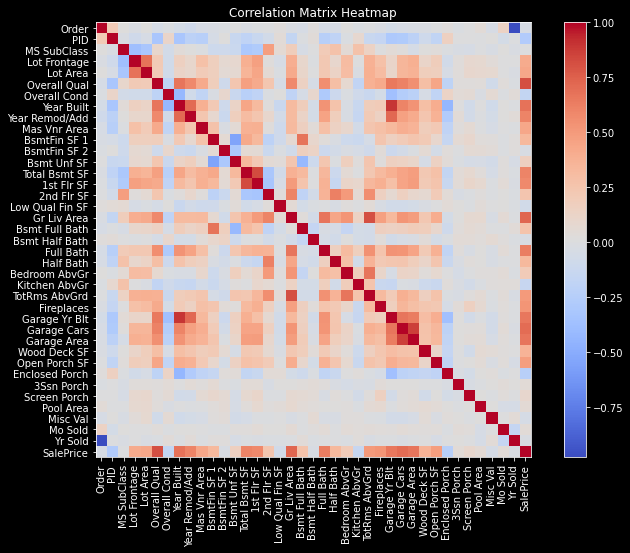

In [70]:
# Calculate the correlation matrix
# numeric_only=True is important if your data contains strings
correlation_matrix=dataframe.corr(method='spearman', numeric_only=True)
import matplotlib.pyplot as plt

# Using a standard heatmap style
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()

# Setting labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90, color='white')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, color='white')
plt.title('Correlation Matrix Heatmap', color='white') # Assuming you want white labels

cb = plt.gca().images[-1].colorbar
cb.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='white')
plt.show()

In [71]:
import pandas as pd

# 1. Calculate the correlation matrix
corr_matrix = dataframe.corr(numeric_only=True)

# 2. Convert the matrix to a "Long" format (Pairs)
# This makes it much easier to filter than looking at the whole table
corr_pairs = corr_matrix.unstack()

# 3. Apply the filter for the specific ranges: [-1.0, -0.8] and [0.8, 1.0)
# Note: We use < 1.0 to exclude the correlation of a column with itself
strong_corr = corr_pairs[((corr_pairs >= 0.8) | (corr_pairs <= -0.8)) & (corr_pairs < 1.0)]

# 4. Remove duplicates (e.g., if A correlates with B, B also correlates with A)
# We sort the index and drop duplicates to get unique pairs
strong_corr_unique = strong_corr.iloc[::2] 

print("Strong Correlations (|r| >= 0.8):")
if not strong_corr_unique.empty:
    print(strong_corr_unique.sort_values(ascending=False))
else:
    print("No features found in those correlation ranges.")

Strong Correlations (|r| >= 0.8):
Garage Area    Garage Cars      0.889662
Garage Yr Blt  Year Built       0.845046
Gr Liv Area    TotRms AbvGrd    0.807772
Total Bsmt SF  1st Flr SF       0.800659
Order          Yr Sold         -0.975993
dtype: float64


In [72]:

cols_to_remove = ["Garage Area","Garage Yr Blt","Gr Liv Area","Total Bsmt SF", "Order", 'PID']

# Method A: Overwriting the dataframe (Recommended)
dataframe = dataframe.drop(columns=cols_to_remove)

# Method B: Using axis=1
# dataframe = dataframe.drop(cols_to_remove, axis=1)

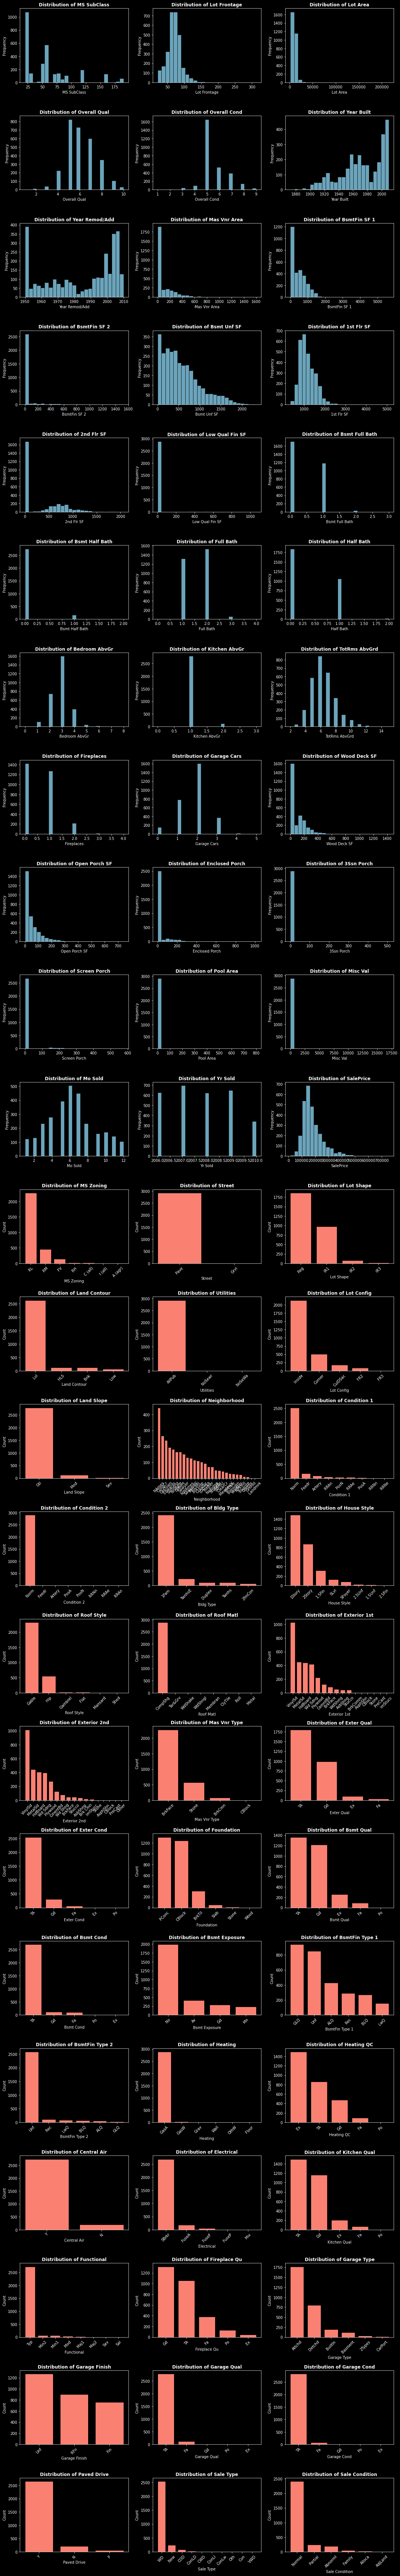

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Separate your columns by type
numeric_cols = dataframe.select_dtypes(include=['number']).columns
categorical_cols = dataframe.select_dtypes(exclude=['number']).columns
all_features = list(numeric_cols) + list(categorical_cols)

# 2. Setup the grid layout (3 columns wide)
n_cols = 3
n_rows = (len(all_features) + n_cols - 1) // n_cols

# Use a dark background style to make white labels pop, 
# or set manually if you prefer a custom background.
plt.style.use('dark_background') 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Makes the grid easy to loop through

for i, col in enumerate(all_features):
    ax = axes[i]
    
    if col in numeric_cols:
        # NUMERIC: Plot a Histogram
        ax.hist(dataframe[col].dropna(), bins=25, color='skyblue', edgecolor='black', alpha=0.8)
        ax.set_ylabel('Frequency', color='white')
    else:
        # CATEGORICAL: Plot a Bar Chart
        counts = dataframe[col].value_counts()
        ax.bar(counts.index.astype(str), counts.values, color='salmon', edgecolor='black')
        ax.set_ylabel('Count', color='white')
        # Rotate x-labels if they are categorical strings
        ax.tick_params(axis='x', rotation=45)

    # Styling labels to WHITE
    ax.set_title(f'Distribution of {col}', color='white', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, color='white')
    ax.tick_params(colors='white') # Changes tick numbers to white
    
    # Optional: Make the plot border (spines) white
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

# 3. Clean up empty subplots (if features don't fill the last row perfectly)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [74]:

cols_to_remove = ["Garage Cond","Garage Qual","Street","Utilities", "Condition 2", 'Roof Matl', "Heating", "BsmtFin SF 2","Low Qual Fin SF","Kitchen AbvGr","Enclosed Porch","3Ssn Porch","Screen Porch","Pool Area","Misc Val"]

# Method A: Overwriting the dataframe (Recommended)
dataframe = dataframe.drop(columns=cols_to_remove)

# Method B: Using axis=1
# dataframe = dataframe.drop(cols_to_remove, axis=1)

1. Converting distribution to gaussian

In [89]:
df1=dataframe.copy()
df2=dataframe.copy()
df3=dataframe.copy()


1. Log Transformation

In [90]:
import numpy as np
import pandas as pd

# 1. Calculate skewness for all numerical columns
numeric_cols = df1.select_dtypes(include=['number']).columns
skew_values = df1[numeric_cols].skew().sort_values(ascending=False)

# 2. Identify highly skewed columns (threshold = 0.75)
skewed_cols = skew_values[abs(skew_values) > 0.75].index

print(f"Detected {len(skewed_cols)} highly skewed columns.")

# 3. Apply log transformation (log1p) only to those columns
for col in skewed_cols:
    df1[col] = np.sqrt(np.expm1(df1[col]))

# 4. Verify the new skewness
new_skew = df1[skewed_cols].skew()
print("\nSkewness improvement (Target is close to 0):")
print(pd.DataFrame({'Original': skew_values[skewed_cols], 'New': new_skew}))

Detected 13 highly skewed columns.

Skewness improvement (Target is close to 0):
                 Original        New
Lot Area        12.820898        NaN
Bsmt Half Bath   3.942389   3.907614
Mas Vnr Area     2.619305        NaN
Open Porch SF    2.535386        NaN
Wood Deck SF     1.842678        NaN
SalePrice        1.743500        NaN
Lot Frontage     1.553112  38.255705
1st Flr SF       1.469429        NaN
BsmtFin SF 1     1.416567        NaN
MS SubClass      1.357579   6.715535
Bsmt Unf SF      0.923403        NaN
2nd Flr SF       0.866457        NaN
TotRms AbvGrd    0.753543  13.005176


c:\Users\PRINCE\anaconda3\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\PRINCE\anaconda3\lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


In [91]:
import numpy as np
import pandas as pd

# 1. Calculate skewness for all numerical columns
numeric_cols = df2.select_dtypes(include=['number']).columns
skew_values = df2[numeric_cols].skew().sort_values(ascending=False)

# 2. Identify highly skewed columns (threshold = 0.75)
skewed_cols = skew_values[abs(skew_values) > 0.75].index

print(f"Detected {len(skewed_cols)} highly skewed columns.")

# 3. Apply log transformation (log1p) only to those columns
for col in skewed_cols:
    df2[col] = np.log1p(df2[col])

# 4. Verify the new skewness
new_skew = df2[skewed_cols].skew()
print("\nSkewness improvement (Target is close to 0):")
print(pd.DataFrame({'Original': skew_values[skewed_cols], 'New': new_skew}))

Detected 13 highly skewed columns.

Skewness improvement (Target is close to 0):
                 Original       New
Lot Area        12.820898 -0.498335
Bsmt Half Bath   3.942389  3.785237
Mas Vnr Area     2.619305  0.541950
Open Porch SF    2.535386 -0.046258
Wood Deck SF     1.842678  0.154203
SalePrice        1.743500 -0.014773
Lot Frontage     1.553112 -0.890167
1st Flr SF       1.469429  0.062356
BsmtFin SF 1     1.416567 -0.622780
MS SubClass      1.357579  0.238133
Bsmt Unf SF      0.923403 -2.149313
2nd Flr SF       0.866457  0.310399
TotRms AbvGrd    0.753543  0.029989


In [92]:
import numpy as np

# Apply SQRT instead of Log
target_cols = ['Bsmt Unf SF', 'Bsmt Half Bath']

for col in target_cols:
    # Use np.sqrt()
    # Note: If you are using data that was already log-transformed, 
    # you MUST reload the original values first.
    df3[col] = np.sqrt(df3[col])

# Check the improvement
print("New Skewness after SQRT:")
print(df3[target_cols].skew())

New Skewness after SQRT:
Bsmt Unf SF      -0.235168
Bsmt Half Bath    3.749323
dtype: float64


In [93]:

cols_to_remove = ["Bsmt Half Bath"]

# Method A: Overwriting the dataframe (Recommended)
dataframe = dataframe.drop(columns=cols_to_remove)

# Method B: Using axis=1
# dataframe = dataframe.drop(cols_to_remove, axis=1)

In [94]:
df4=dataframe.copy()

In [95]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# 1. Identify numerical columns
numeric_cols = df4.select_dtypes(include=['number']).columns

# 2. Initialize the PowerTransformer with the 'yeo-johnson' method
# standardize=True will also scale your data (mean=0, variance=1) 
# which is great for most Machine Learning models.
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# 3. Fit and Transform the numerical data
# We create a copy to avoid the "SettingWithCopy" warning
df_transformed = df4.copy()
df_transformed[numeric_cols] = pt.fit_transform(df4[numeric_cols])

# 4. Check the new skewness
new_skew = df_transformed[numeric_cols].skew().sort_values(ascending=False)
print("New Skewness after Yeo-Johnson (Target is 0):")
print(new_skew)

New Skewness after Yeo-Johnson (Target is 0):
Half Bath         0.537265
Mas Vnr Area      0.461997
Bsmt Full Bath    0.350261
2nd Flr SF        0.300581
Lot Frontage      0.136923
Wood Deck SF      0.132446
Yr Sold           0.131848
Fireplaces        0.111342
Lot Area          0.101414
Bedroom AbvGr     0.092312
Overall Cond      0.090978
MS SubClass       0.068584
Overall Qual      0.018850
SalePrice         0.001536
1st Flr SF       -0.000896
TotRms AbvGrd    -0.000914
Garage Cars      -0.007441
Open Porch SF    -0.028816
Full Bath        -0.029237
Mo Sold          -0.050698
Year Built       -0.137855
Year Remod/Add   -0.206943
Bsmt Unf SF      -0.276859
BsmtFin SF 1     -0.404183
dtype: float64


c:\Users\PRINCE\anaconda3\lib\site-packages\numpy\_core\_methods.py:188: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


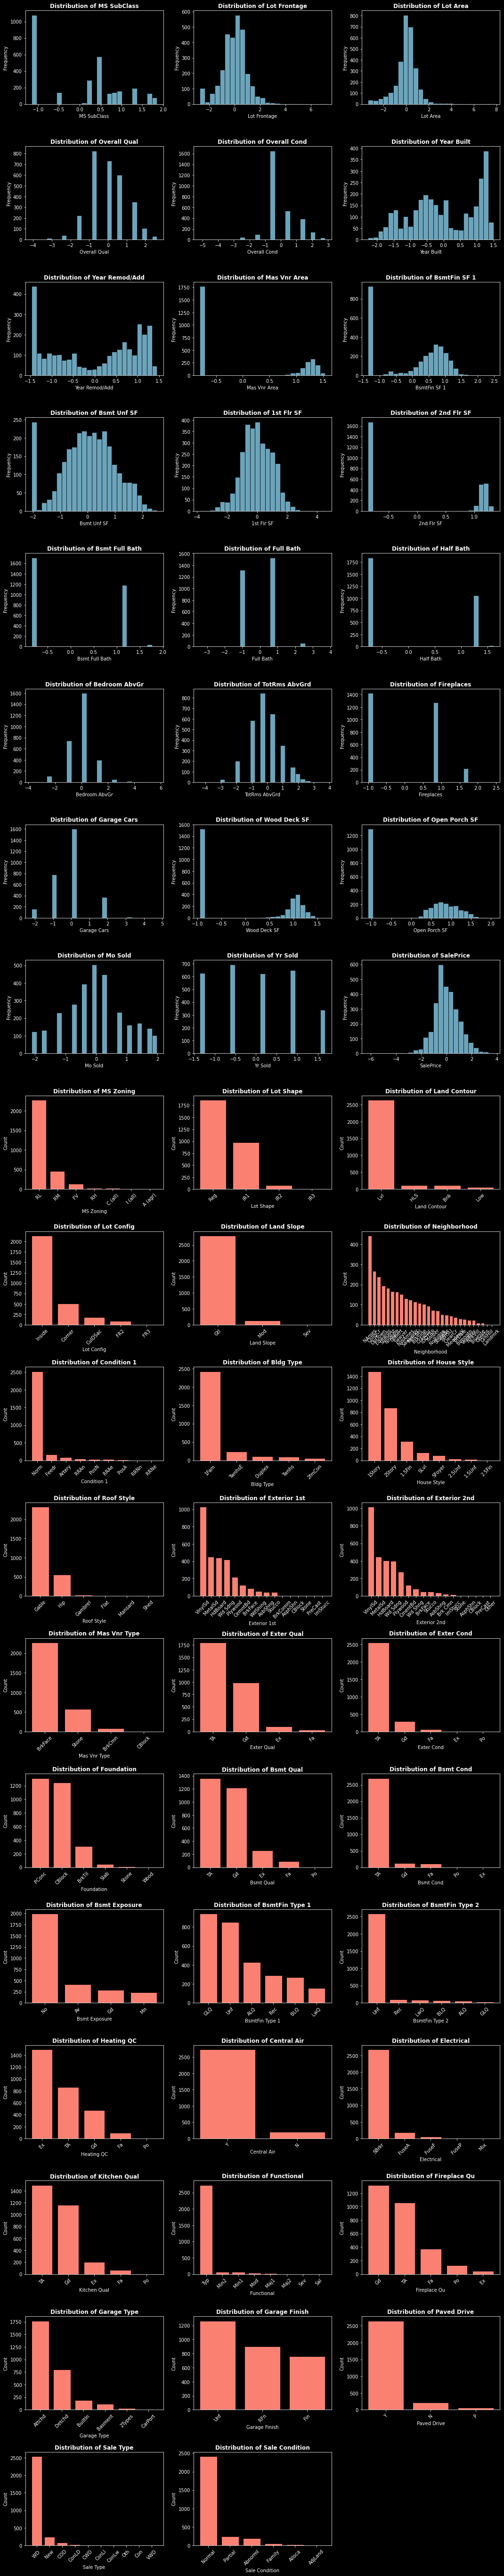

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Separate your columns by type
numeric_cols = df_transformed.select_dtypes(include=['number']).columns
categorical_cols = df_transformed.select_dtypes(exclude=['number']).columns
all_features = list(numeric_cols) + list(categorical_cols)

# 2. Setup the grid layout (3 columns wide)
n_cols = 3
n_rows = (len(all_features) + n_cols - 1) // n_cols

# Use a dark background style to make white labels pop, 
# or set manually if you prefer a custom background.
plt.style.use('dark_background') 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Makes the grid easy to loop through

for i, col in enumerate(all_features):
    ax = axes[i]
    
    if col in numeric_cols:
        # NUMERIC: Plot a Histogram
        ax.hist(df_transformed[col].dropna(), bins=25, color='skyblue', edgecolor='black', alpha=0.8)
        ax.set_ylabel('Frequency', color='white')
    else:
        # CATEGORICAL: Plot a Bar Chart
        counts =df_transformed[col].value_counts()
        ax.bar(counts.index.astype(str), counts.values, color='salmon', edgecolor='black')
        ax.set_ylabel('Count', color='white')
        # Rotate x-labels if they are categorical strings
        ax.tick_params(axis='x', rotation=45)

    # Styling labels to WHITE
    ax.set_title(f'Distribution of {col}', color='white', fontsize=12, fontweight='bold')
    ax.set_xlabel(col, color='white')
    ax.tick_params(colors='white') # Changes tick numbers to white
    
    # Optional: Make the plot border (spines) white
    for spine in ax.spines.values():
        spine.set_edgecolor('white')

# 3. Clean up empty subplots (if features don't fill the last row perfectly)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

1. ONE HOT ENCODING

In [98]:
# drop_first=True prevents the "Dummy Variable Trap" (multicollinearity)
# by removing one redundant column for each feature.
df_encoded = pd.get_dummies(df_transformed, drop_first=True, dtype=int)

print(df_encoded.head())

   MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0    -1.161262      2.725331  2.700352     -0.041471     -0.479474   
1    -1.161262      0.514529  0.505977     -0.764450      0.427841   
2    -1.161262      0.556451  0.930540     -0.041471      0.427841   
3    -1.161262      1.041052  0.423315      0.655517     -0.479474   
4     0.481056      0.257429  0.865400     -0.764450     -0.479474   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  Bsmt Unf SF  ...  \
0   -0.534675       -1.172090      1.147475      0.738337    -0.010716  ...   
1   -0.503774       -1.139528     -0.803463      0.552613    -0.453265  ...   
2   -0.595483       -1.235463      1.139975      0.975356    -0.092608  ...   
3   -0.277854       -0.894228     -0.803463      1.073108     1.062372  ...   
4    0.862072        0.591270     -0.803463      0.873451    -0.919400  ...   

   Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
0                0              0    